##**Covid-Cases Forecasting**

In [155]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
df=pd.read_csv("/content/Covid_19_Clean_Complete -TA Ajinkya.csv")

In [157]:
df.shape

(49068, 10)

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


##EDA

In [159]:
df.rename(columns={"Province/State":"State", "Country/Region":"Country"},inplace=True)

In [160]:
df.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [161]:
df_confirmed=df.groupby("Date")["Confirmed"].sum().reset_index()

In [162]:
df_confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


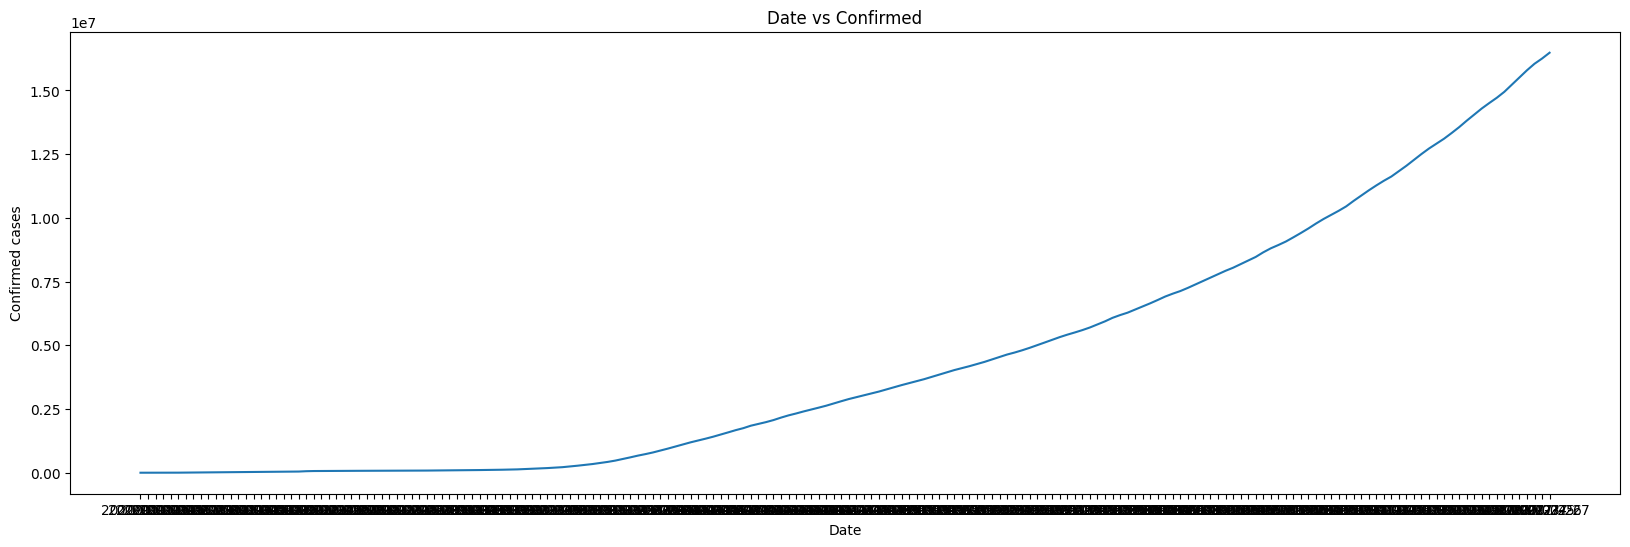

In [163]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df_confirmed,x="Date",y="Confirmed")
plt.xlabel("Date")
plt.ylabel("Confirmed cases")
plt.title("Date vs Confirmed")
plt.show()

In [164]:
df_deaths=df.groupby("Date")["Deaths"].sum().reset_index()

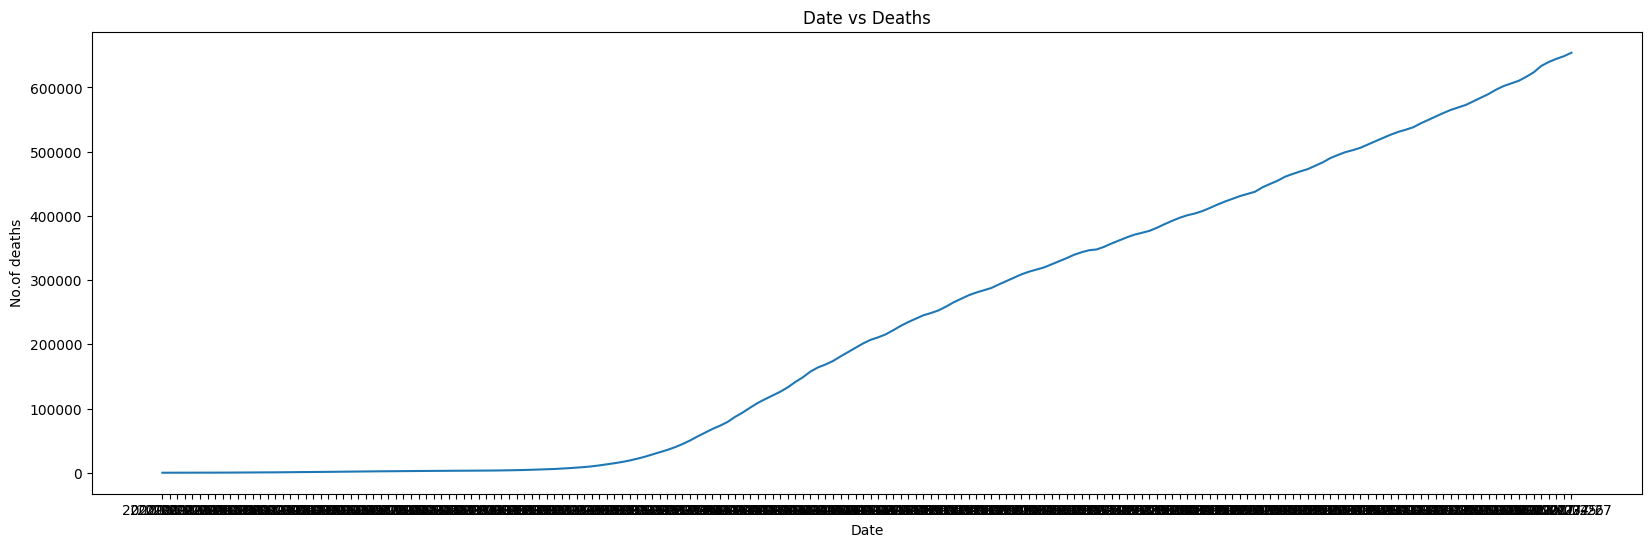

In [165]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df_deaths,x="Date",y="Deaths")
plt.xlabel("Date")
plt.ylabel("No.of deaths")
plt.title("Date vs Deaths")
plt.show()

In [166]:
df_recovery=df.groupby("Date")["Recovered"].sum().reset_index()

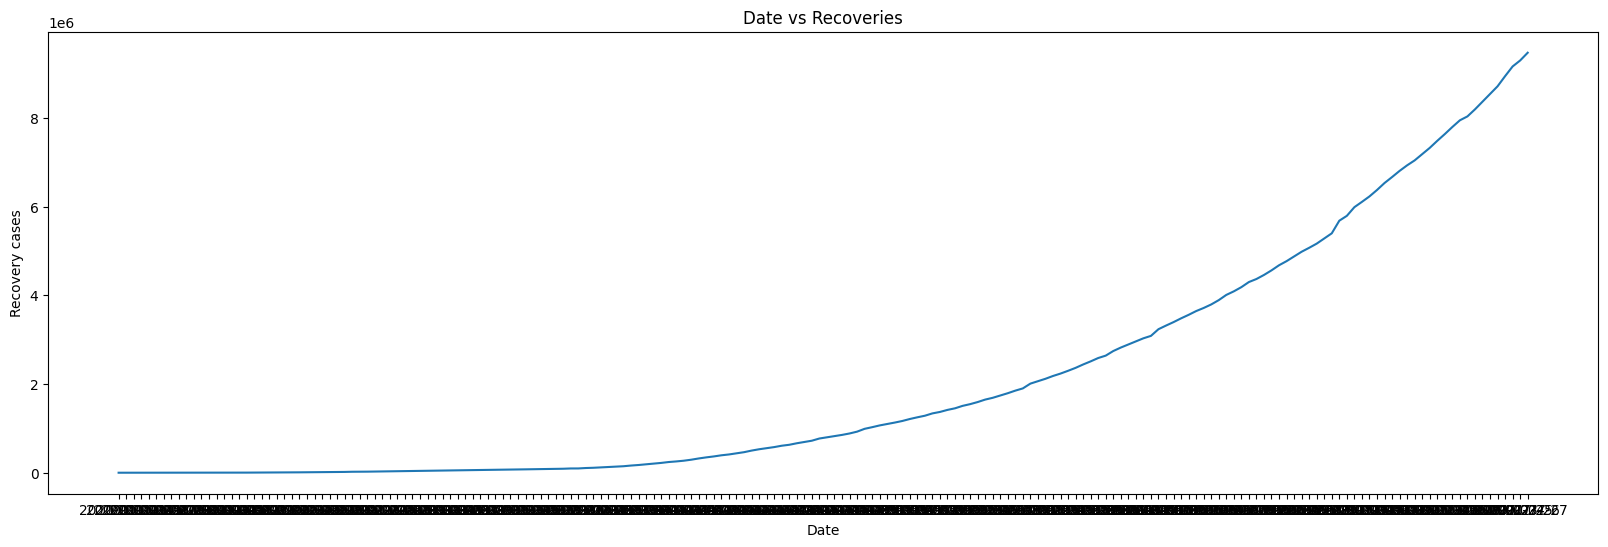

In [167]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df_recovery,x="Date",y="Recovered")
plt.xlabel("Date")
plt.ylabel("Recovery cases")
plt.title("Date vs Recoveries")
plt.show()

In [168]:
df_active=df.groupby("Date")["Active"].sum().reset_index()

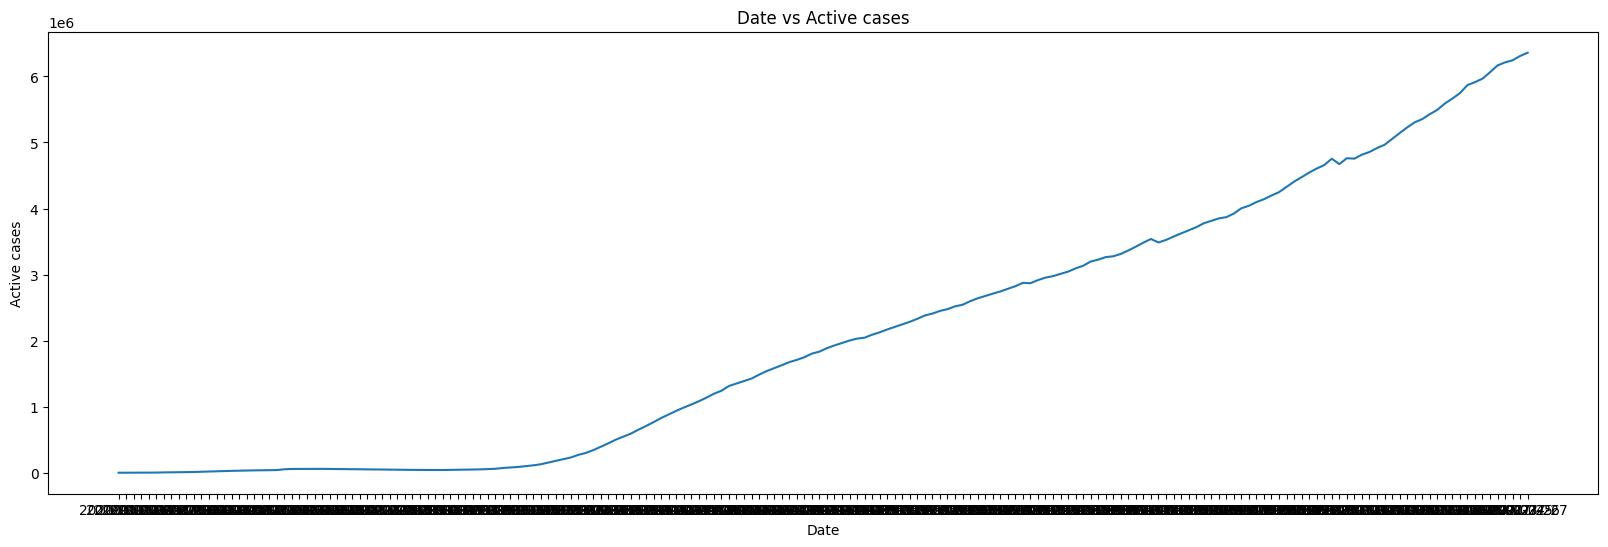

In [169]:
plt.figure(figsize=(20,6))
sns.lineplot(data=df_active,x="Date",y="Active")
plt.xlabel("Date")
plt.ylabel("Active cases")
plt.title("Date vs Active cases")
plt.show()

In [170]:
df_all_date=df.groupby(["Date"])[["Confirmed","Deaths","Recovered","Active"]].sum().reset_index()

In [171]:
df_all_date

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,555,17,28,510
1,2020-01-23,654,18,30,606
2,2020-01-24,941,26,36,879
3,2020-01-25,1434,42,39,1353
4,2020-01-26,2118,56,52,2010
...,...,...,...,...,...
183,2020-07-23,15510481,633506,8710969,6166006
184,2020-07-24,15791645,639650,8939705,6212290
185,2020-07-25,16047190,644517,9158743,6243930
186,2020-07-26,16251796,648621,9293464,6309711


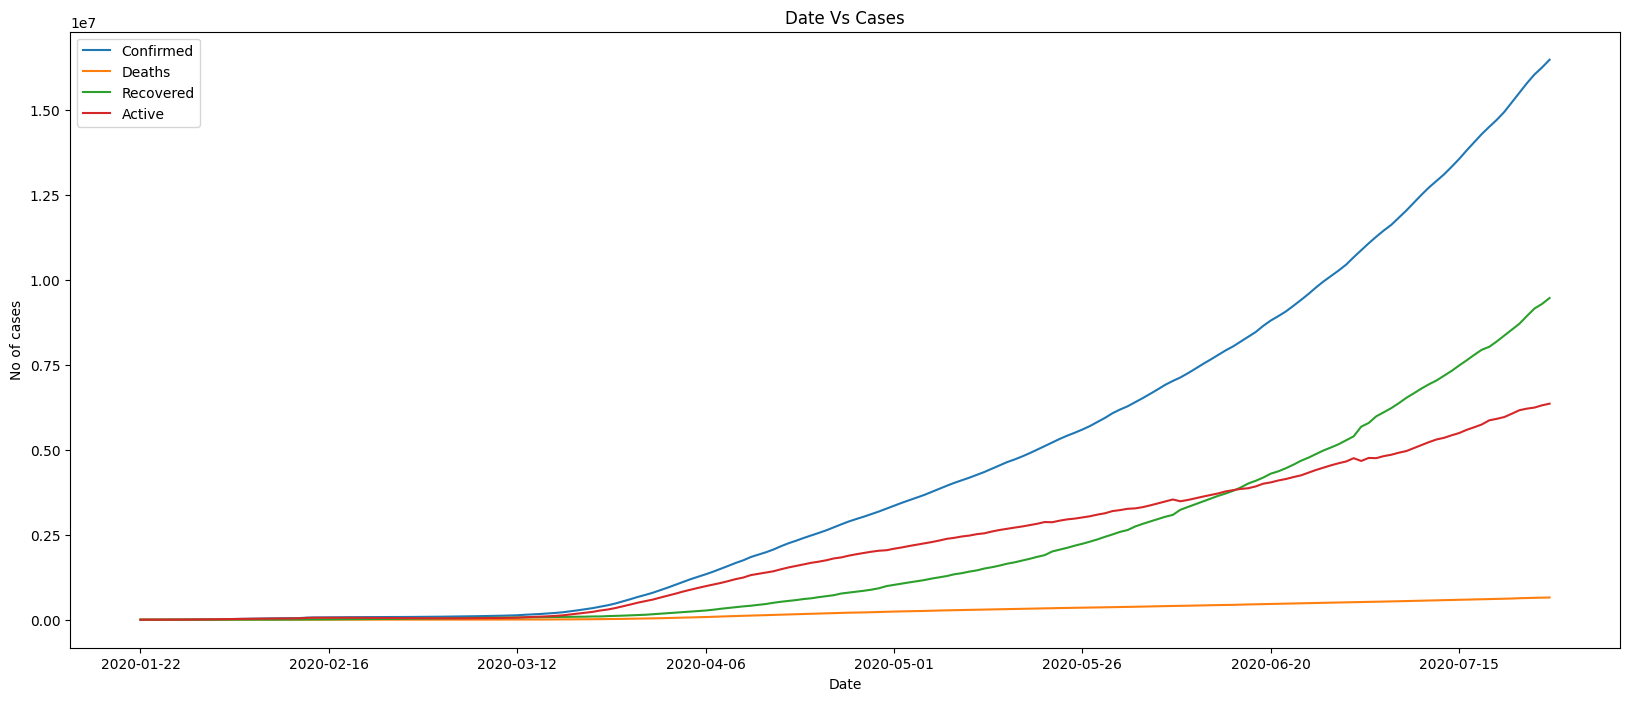

In [172]:
df_all_date.plot(figsize=(20,8),x="Date")
plt.xlabel("Date")
plt.ylabel("No of cases")
plt.title("Date Vs Cases")
plt.show()

##Model -- Prophet-advanced tsa tool

In [173]:
#Prophet is a tsa tool developed by Facebook which is used for wide-range time series data effectively.
!pip install Prophet

Forecasting the confirmed cases for next 10 dates

In [174]:
from prophet import Prophet

In [175]:
model=Prophet()

In [176]:
df_confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [177]:
#Prophet --- the should be given in ds and y aa x=ds,y=y

In [178]:
df_confirmed.columns=["ds","y"]

In [179]:
df_confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [180]:
model.fit(df_confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1mko_fq/57204yka.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpc1mko_fq/rs0ba03b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95422', 'data', 'file=/tmp/tmpc1mko_fq/57204yka.json', 'init=/tmp/tmpc1mko_fq/rs0ba03b.json', 'output', 'file=/tmp/tmpc1mko_fq/prophet_modeldeootuil/prophet_model-20250625091904.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:19:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:19:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Forcasting


In [181]:
#forecast--periods - the no of next(dates) row values in df[confirmed]
mod=model.make_future_dataframe(periods=10)

In [182]:
forecast=model.predict(mod)

In [183]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.272968e+05,7.678969e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.134554e+05,9.816603e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-1.002957e+05,1.116484e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.432328e+04,1.174664e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-9.813342e+04,1.118216e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2020-08-02,1.735700e+07,1.724921e+07,1.748488e+07,1.732898e+07,1.738275e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07
194,2020-08-03,1.756099e+07,1.744485e+07,1.768484e+07,1.752163e+07,1.759914e+07,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,-2102.756726,0.0,0.0,0.0,1.755889e+07
195,2020-08-04,1.776498e+07,1.762325e+07,1.786460e+07,1.771533e+07,1.781112e+07,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,-16846.245488,0.0,0.0,0.0,1.774813e+07
196,2020-08-05,1.796897e+07,1.783337e+07,1.808057e+07,1.790802e+07,1.802821e+07,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,1.795791e+07


In [184]:
forecast[["yhat_lower","yhat","yhat_upper"]]
#Holiday effect-- in prophet it states the lb and ub to stabilize the predicted value --yhat is the target,yhat_upper&yhat_lower contains the target within the boundary

,yhat_lower,yhat,yhat_upper
0,-1.272968e+05,-2.067684e+04,7.678969e+04
1,-1.134554e+05,-8.050948e+03,9.816603e+04
2,-1.002957e+05,5.827455e+03,1.116484e+05
3,-9.432328e+04,1.217668e+04,1.174664e+05
4,-9.813342e+04,8.405020e+03,1.118216e+05
...,...,...,...
193,1.724921e+07,1.736430e+07,1.748488e+07
194,1.744485e+07,1.755889e+07,1.768484e+07
195,1.762325e+07,1.774813e+07,1.786460e+07
196,1.783337e+07,1.795791e+07,1.808057e+07


##Visualization of Forcasted values

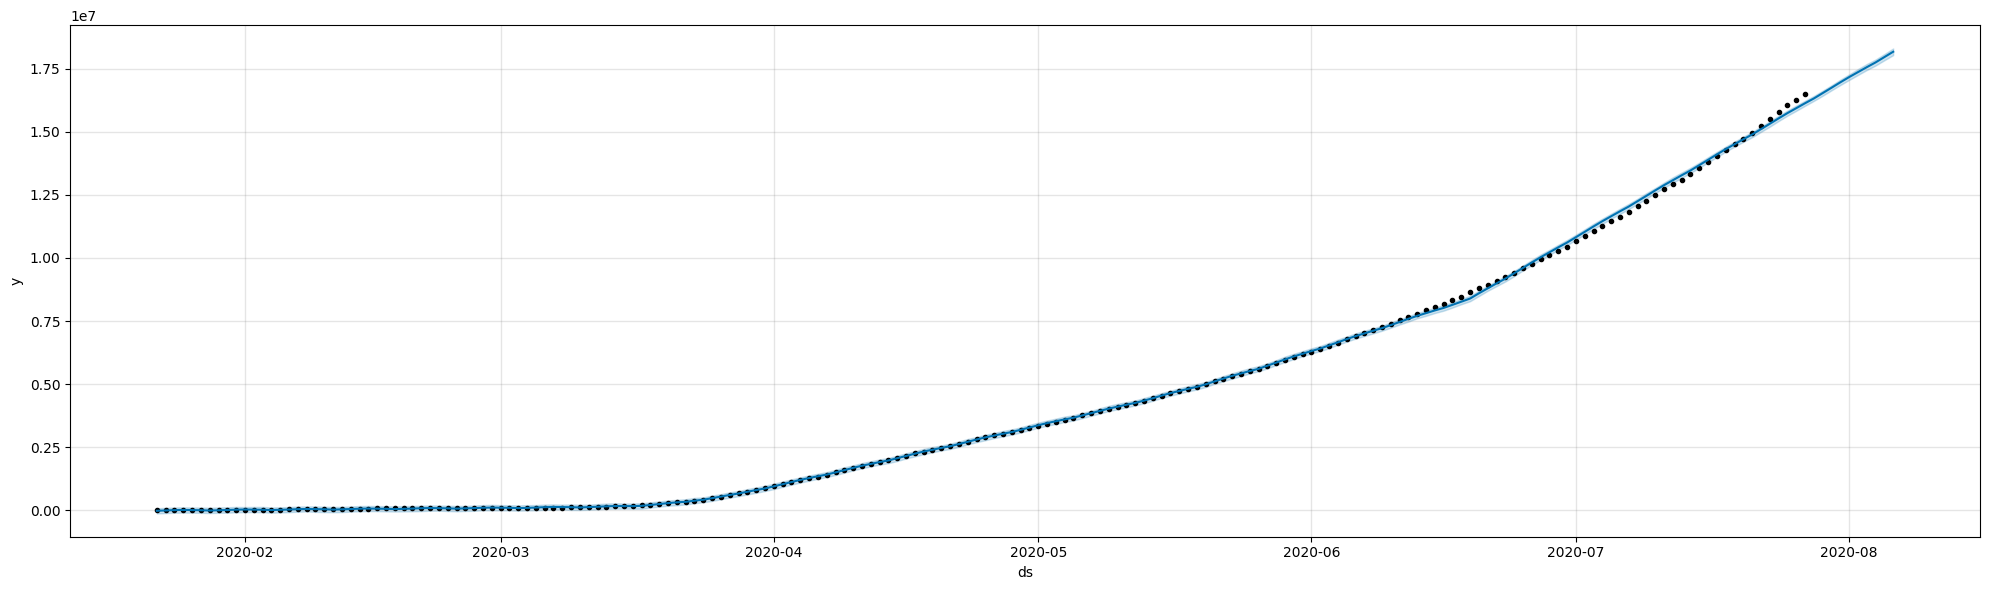

In [185]:
model.plot(forecast,figsize=(20,6))
plt.show()

##Visualization of World map with active cases

In [186]:
# plotly --- advanced tool for ploting
import plotly.express as ex

In [187]:
world=df_all_date

In [190]:
world = df.groupby("Country")["Active"].sum().reset_index()
figure = ex.choropleth(world, locations='Country', locationmode='country names', color='Active', hover_name='Country', range_color=[1,100000], color_continuous_scale='reds', title='World map showing all the actives cases ')
figure.show()